[['SUP210']
 ['SUP173']
 ['SUP162']
 ...
 ['SUP302']
 ['SUP252']
 ['SUP155']]
No of  year 3
No of Months 12
No of Active  Customers 225
No of Bills 943
No of Payments 794
No of Billing_Index  1097
No of Collection_Index 1292
No of Bill_Amount_(NGN) 1311
No of Collection_Amount_(NGN) 1298
No of Collection_Efficiency  1311
No of KwH_CONSUMPTION 1309
No of CSP_CODE 97
      Year Month  Active Customers  No of Bills  No of Payments  \
0     2017   Aug               675          821               1   
1     2017   Aug              1603         2707               1   
2     2017   Sep               622         1265               1   
3     2016   Dec               297         1152               1   
4     2017   Aug               622         1265               2   
...    ...   ...               ...          ...             ...   
1306  2016   Oct              2288          151             208   
1307  2017   Feb               402          264             168   
1308  2017   Feb             

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


EXPLAINABILITY ON DECISION TREE MODEL
Elapsed Time is : 0.27649474 seconds 


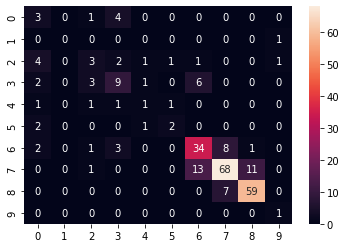

In [15]:
import numpy as np 
import pandas as pd 
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import minmax_scale 
from sklearn.metrics import classification_report
import shap
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

import  time 
t = time.time()


dataset = pd.read_csv('NT_DATA_2.csv', header = 0, delim_whitespace=False, index_col=None) #read data  

df = pd.DataFrame(dataset) #convert  to  a  dataframe

# data_description
year = len(np.unique(df.iloc[:, [0]]))
Month = len(np.unique(df.iloc[:, [1]]))
Active_Customers  = len(np.unique(df.iloc[:, [2]]))
No_of_Bills  = len(np.unique(df.iloc[:, [3]]))
No_of_Payments  = len(np.unique(df.iloc[:, [4]]))
Billing_Index = len(np.unique(df.iloc[:, [5]]))
Collection_Index = len(np.unique(df.iloc[:, [6]]))
Bill_Amount_NGN =len(np.unique(df.iloc[:, [7]]))
Collection_Amount_NGN = len(np.unique(df.iloc[:, [8]]))
Collection_Efficiency = len(np.unique(df.iloc[:, [9]]))
KwH_CONSUMPTION = len(np.unique(df.iloc[:, [10]]))
CSP_CODE = len(np.unique(df.iloc[:, [11]]))
#labelencoder = LabelEncoder()
print(np.array(df.iloc[:, [12]]))
#SUPERVISOR_CODE= labelencoder.fit_transform(np.array(df.iloc[:, [12]]))
#SUPERVISOR_CODE = len(np.unique(np.array(df.iloc[:, [12]]) ))

print('No of  year', year)
print('No of Months', Month)
print('No of Active  Customers', Active_Customers )
print('No of Bills', No_of_Bills)
print('No of Payments', No_of_Payments )
print('No of Billing_Index ', Billing_Index )
print('No of Collection_Index', Collection_Index)
print('No of Bill_Amount_(NGN)', Bill_Amount_NGN)
print('No of Collection_Amount_(NGN)',Collection_Amount_NGN)
print('No of Collection_Efficiency ', Collection_Efficiency )
print('No of KwH_CONSUMPTION', KwH_CONSUMPTION)
print('No of CSP_CODE', CSP_CODE)
#print('No of SUPERVISOR_CODE', SUPERVISOR_CODE)

#Define  bins  in percentiles
bins  = [0, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 1]

#Rating  of  Collection Efficiency
group_CE = ['LOWEST', 'LOWER', 'LOW', 'FAIRLY_BELOW_AVERAGE', 'AVERAGE', 'FAIRLY_ABOVE_AVERAGE', 'FAIRLY_GOOD', 'GOOD', 'VERY GOOD', 'EXCELLENT' ]

df['CE_RATING'] = pd.cut(df['Collection Efficiency'] , bins, labels=group_CE)

print(df)

#get all categorical columns
cat_columns = df.select_dtypes(['object']).columns

#convert all categorical columns to numeric
df[cat_columns] = df[cat_columns].apply(lambda x: pd.factorize(x)[0])

print(df)


k = np.array(df.iloc[:,[13]])

u, c =np.unique(k, return_counts=True)
print(dict(zip(u, c)))


data_X = minmax_scale(df.iloc[:,[0,1,2,3,4,5,6,7,8,10,11,12]])
data_X = pd.DataFrame(data_X)
data_y = df.iloc[:,[13]]
print(data_X)
print(data_y)


train_X=data_X.sample(frac=0.80,random_state=100) #20, 40, 50, 80, 100
test_X=data_X.drop(train_X.index)

train_y=data_y.sample(frac=0.80,random_state=100)
test_y=data_y.drop(train_y.index)
print(train_X)
print(train_y)
print(test_X)
print(test_y)


model = DecisionTreeClassifier().fit(train_X, train_y)
train_pred  = model.predict(train_X)
test_pred  = model.predict(test_X)



print('TRAINING CLASSIFICATION REPORT')
print(classification_report(train_y, train_pred))

print('TESTING CLASSIFICATION REPORT')
print(classification_report(test_y, test_pred))


print('TRAINING ACCURACY REPORT')
print(accuracy_score(train_y, train_pred))

print('TESTING ACCURACY REPORT')
print(accuracy_score(test_y, test_pred))

decision_tree_matrix =  confusion_matrix(test_y, test_pred)


print('CONFUSION MATRIX IN THE TESTING PHASE')

sns.heatmap(decision_tree_matrix, annot=True)

print('EXPLAINABILITY ON DECISION TREE MODEL')


elapsed = time.time() - t

print('Elapsed Time is : %.8f seconds ' % (elapsed))




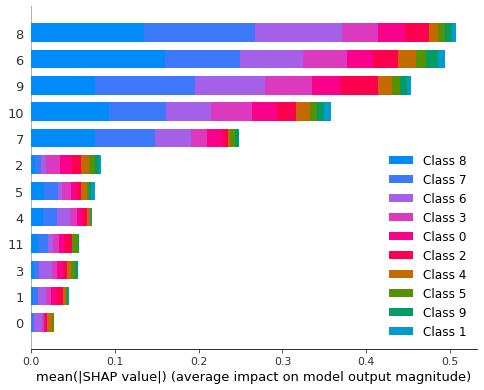

In [16]:
# Generate the Tree explainer and SHAP values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(test_X)
expected_value = explainer.expected_value

############## visualizations #############
# Generate summary bar plot
shap.summary_plot(shap_values, test_X, title="SHAP summary plot") 

